In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
test = pd.read_csv('mnist_test.csv',header=None)
train = pd.read_csv('mnist_train.csv', header=None)

In [3]:
def preprocess(data):
    X = data.iloc[:, 1:]
    y = data.iloc[:, 0]
    digits = {j:[] for j in range(10)}
    for j in range(len(y)):
        cur_label = int(y[j])
        cur_pixel_data = np.array(X.iloc[j]).reshape(28,28)
        digits[cur_label].append(cur_pixel_data)
    digits = {j:np.stack(digits[j]) for j in range(10)}
    for j in range(10):
        print('shape of data with label', j, ':', digits[j].shape)
    
    return digits

train_digits = preprocess(train)
test_digits = preprocess(test)

shape of data with label 0 : (5923, 28, 28)
shape of data with label 1 : (6742, 28, 28)
shape of data with label 2 : (5958, 28, 28)
shape of data with label 3 : (6131, 28, 28)
shape of data with label 4 : (5842, 28, 28)
shape of data with label 5 : (5421, 28, 28)
shape of data with label 6 : (5918, 28, 28)
shape of data with label 7 : (6265, 28, 28)
shape of data with label 8 : (5851, 28, 28)
shape of data with label 9 : (5949, 28, 28)
shape of data with label 0 : (980, 28, 28)
shape of data with label 1 : (1135, 28, 28)
shape of data with label 2 : (1032, 28, 28)
shape of data with label 3 : (1010, 28, 28)
shape of data with label 4 : (982, 28, 28)
shape of data with label 5 : (892, 28, 28)
shape of data with label 6 : (958, 28, 28)
shape of data with label 7 : (1028, 28, 28)
shape of data with label 8 : (974, 28, 28)
shape of data with label 9 : (1009, 28, 28)


In [4]:
train_one_data = train_digits[1]
train_two_data = train_digits[2]

train_one_labels = np.ones(len(train_one_data))
train_two_labels = np.ones(len(train_two_data))*-1

train_one_data = np.reshape(train_one_data, (len(train_one_data), 28*28))
train_two_data = np.reshape(train_two_data, (len(train_two_data), 28*28))

train_two_data.shape

(5958, 784)

In [5]:
train_one_data = train_one_data[:2000]
train_two_data = train_two_data[:2000]

train_one_labels = train_one_labels[:2000]
train_two_labels = train_two_labels[:2000]

train_data = np.concatenate((train_one_data, train_two_data))
train_labels = np.concatenate((train_one_labels, train_two_labels))

train_data.shape, train_labels.shape

((4000, 784), (4000,))

In [6]:
test_one_data = test_digits[1]
test_two_data = test_digits[2]

test_one_labels = np.ones(len(test_one_data))
test_two_labels = np.ones(len(test_two_data))*-1

test_one_data = np.reshape(test_one_data, (len(test_one_data), 28*28))
test_two_data = np.reshape(test_two_data, (len(test_two_data), 28*28))

test_two_data.shape

(1032, 784)

In [7]:
test_one_data = test_one_data[:500]
test_two_data = test_two_data[:500]

test_one_labels = test_one_labels[:500]
test_two_labels = test_two_labels[:500]

test_data = np.concatenate((test_one_data, test_two_data))
test_labels = np.concatenate((test_one_labels, test_two_labels))

test_data.shape, test_labels.shape

((1000, 784), (1000,))

In [ ]:
# def update_w_gradient_descent(X, y, lambd, z, u, rho, eta=0.001, max_iter=200, tol=1e-5):
#     w = np.zeros(X.shape[1])
#     w_prev = np.copy(w)
#     for i in range(max_iter):
#         grad = gradient_w(w, X, y, lambd, z, u, rho)
#         w -= eta * grad
        
#         # Check for convergence by looking at the norm of the gradient or change in w
#         if np.linalg.norm(grad) < tol or np.linalg.norm(w - w_prev) < tol:
#             break
#         w_prev = np.copy(w)
#     return w

In [25]:
def F(w, X, y, lambd, z):
    y_reshape = y.reshape(-1, 1)
    logTerm = np.sum(np.log(1+(np.exp(-np.dot(X * y_reshape, w))))) / len(y)
    z_term = (lambd / 2) * np.linalg.norm(z)**2
    return logTerm + z_term

def update_w(w, X, y, z, rho, lr):
    y_reshape = y.reshape(-1, 1)
    grad = np.mean((-y_reshape * X) / (1 + np.exp(y_reshape * np.dot(X, w[:, np.newaxis]))), axis=0)
    w = w - lr * (grad + rho * (w-z))
    return w

def update_z(w, u, lambd, rho):
    return (rho * (w + u)) / (lambd + rho)

def update_u(u, w, z):
    return u + w - z

def admm_logistic_regression(X, y, lambd, rho, iterations, lr, tol):
    w = np.zeros(X.shape[1])
    z = np.zeros(X.shape[1])
    u = np.zeros(X.shape[1])
    F_values = [] 
    w_z_diff = []
    
    for k in range(iterations):
        for _ in np.arange(100):
            w = update_w(w, X, y, z, rho, lr)
        z = update_z(w, u, lambd, rho)
        u = update_u(u, w, z)
        
        # Calculate and store metrics for plotting
        F_value = F(w, X, y, lambd, z) # F(w, z)
        w_z_difference = np.linalg.norm(w - z) # ‖w - z‖
        
        F_values.append(F_value)
        w_z_diff.append(w_z_difference)
    
    return w, z, F_values, w_z_diff

lambd = 0.1
rho = 0.01
iterations = 1000  # Number of ADMM iterations
lr = 0.001  # Learning rate for GD

w, z, F_values, w_z_diff = admm_logistic_regression(train_data, train_labels, lambd, rho, iterations, lr, tol=1e-5)

/var/folders/90/9f8yk06x5m5cqysc4rrbrs_c0000gn/T/ipykernel_2267/813287896.py:9: RuntimeWarning: overflow encountered in exp
  grad = np.mean((-y_reshape * X) / (1 + np.exp(y_reshape * np.dot(X, w[:, np.newaxis]))), axis=0)


### (i)

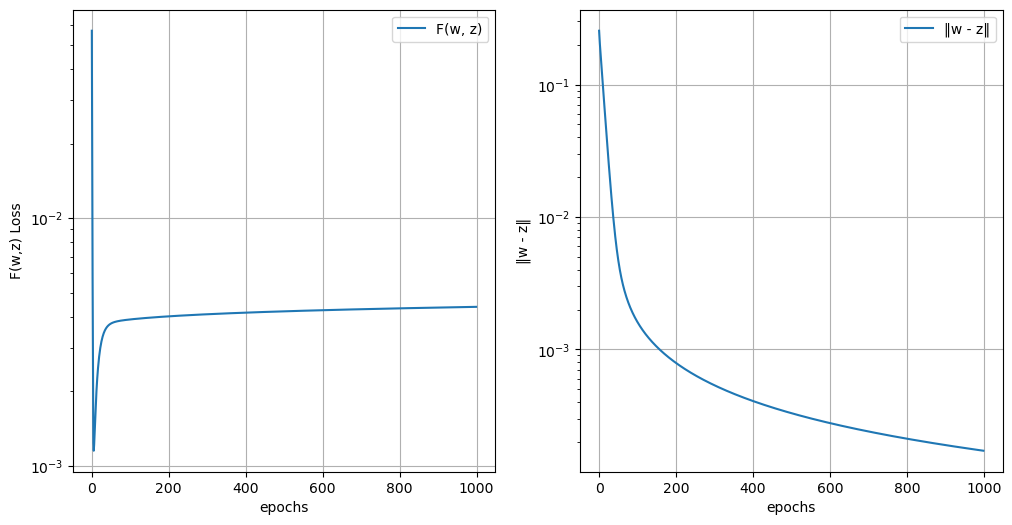

In [29]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.semilogy(F_values, label='F(w, z)')
plt.xlabel('epochs')
plt.ylabel('F(w,z) Loss')
plt.grid()
plt.legend()
plt.subplot(1, 2, 2)
plt.semilogy(w_z_diff, label='‖w - z‖')
plt.xlabel('epochs')
plt.ylabel('‖w - z‖')
plt.legend()
plt.grid()
plt.show()

### (ii)

The above graph is the result of using Gradient Descent as the update method for w, which lacks a closed-form solution. In this approach, the objective function F(w,z) decreases and increase toward a convergence at around 10^-2.5, and the primal residual ∥w−z∥ decrease over epochs. The pattern indicates that the algorithm is learning and that the constraints are being satisfied over time. The computation time for updating w is more substantial than that for z and u, since I have nested a Gradient Descent process with 100 steps in each ADMM iteration due to the absence of a closed-form solution for w. I have experimented with different numbers of iterations, and as the results suggest, by increasing the number of epochs, the constraint ∥w−z∥ indeed converge along with the epochs. Overall the ADMM training led the objective function toward convergence with the given constraint.

### (iii)

In [27]:
def classify(w, X, y):
    y_pred = np.sign(np.dot(X, w))
    return np.mean(y_pred != y)

train_error = classify(w, train_data, train_labels)
test_error = classify(w, test_data, test_labels)

print('Train error: ', train_error)
print('Test error: ', test_error)

Train error:  0.0
Test error:  0.009


### (iv)

ADMM is more flexible and breaks down a problem into smaller sub-problems, each of which can be solved independently. My observation based on this ADMM approach to the previous homework where we used Method of Multipliers is that ADMM has a more powerful way to be written in Scale form so that it can tackle updating step with no closed form solution more flexibly, for instance the GD update I do in above. And the ADMM has strong convergence properties, unlike SGD, which  requires constraints to be incorporated into the objective function as penalties. For instance the train error is 0.0 way smaller than when what we obtain when implementing SGD which had 0.00475 train error. Also I observe ADMM can handle explicitly, leading to better feasibility in solutions. But the downside is the selection of ρ might not be easy also if multiple update steps involve no close form solution, the computational cost can be much more expensive as our above problem suggest, in other words, the breaking down sub-problem each can be complex, and managing the coordination between sub-problems can be hard in distributed settings.